# Part 1: Exploratory Data Analysis(EDA)

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [67]:
data = pd.read_csv('train.csv')

In [68]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
data.isnull().sum() # checking for total null values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

The **Age, Cabin and Embarked** have null values. I will try to fix them.

### How many Survived?
Target: Survived = {0:Died.  1:Survived}

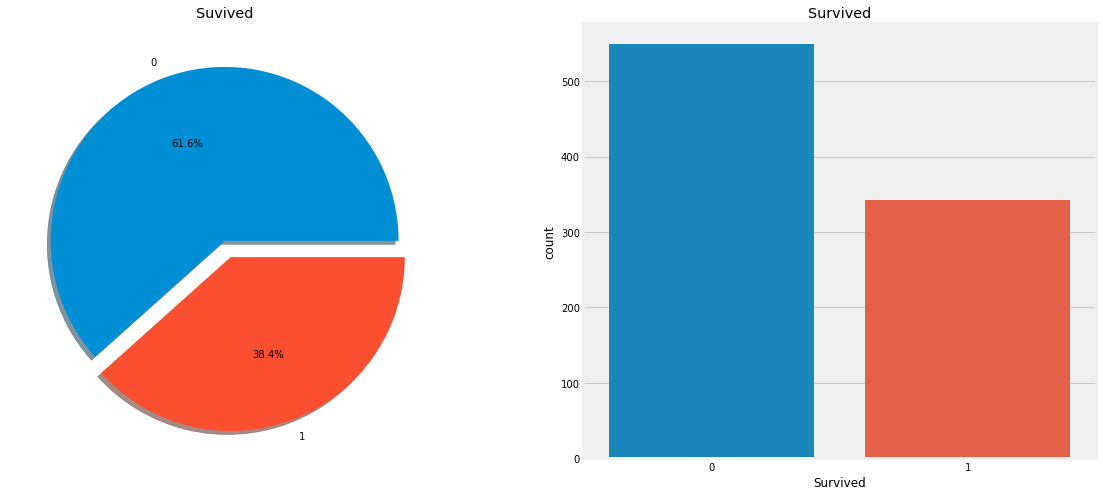

In [70]:
f, ax = plt.subplots(1,2,figsize=(18,8))
data['Survived'].value_counts().plot.pie(explode=[0, 0.1], shadow=True, autopct='%1.1f%%', ax=ax[0])
ax[0].set(title='Suvived', ylabel='')

sns.countplot(data=data, x='Survived', ax=ax[1])
ax[1].set(title='Survived')
plt.show()

It is evident that not many passengers survived the accident.  
  
Out of 891 passengers in training set, only around 350 survived. i.e **Only 38.4%** of the total traning set survived the crash. We need to dig down to get better insights from the data and see which categories of the passengers did survived and who didn't.  
  
We will try to check the survival rate by using different features of the dataset. Some of the features being Sex, Port Of Embarcation, Age, etc.  
  
First, let us understand the different types of features.

## Types of Features  
  
### Categorical Features:  
A categorical variable is one that has two or more categories and each value in that feature can be categorised by them. For example, gender is a categorical variable having two categories (male and female). Now we cannot sort or give any ordering to such variables. They also known as **Nominal Variables**.  
  
**Categorical Features in the dataset: Sex, Embarked**  
  
  
### Ordinal Features:  
An ordinal variable is similar to categorical values, but the difference between them is that we can have relative ordering or sorting between the values. For example, If we haver feature like **Height** with values **Tall, Medium, Short**, then Height is a ordinal variable. Here we can have a relative sort in the variable.  
  
**Ordinal Features in the dataset: Pclass**  
  
  
### Continuous Features:
A feature is said to be continuous if it can take values between any two points or between the minimum or maximum values in the features column.  
  
**Continuous Features in the dataset: Age**

# Analysing The Features

## Sex ⇒ Categorical Feature

In [71]:
pd.DataFrame(data.groupby(['Sex','Survived'])['Survived'].count())

Survived
Sex    Survived          
female 0               81
       1              233
male   0              468
       1              109

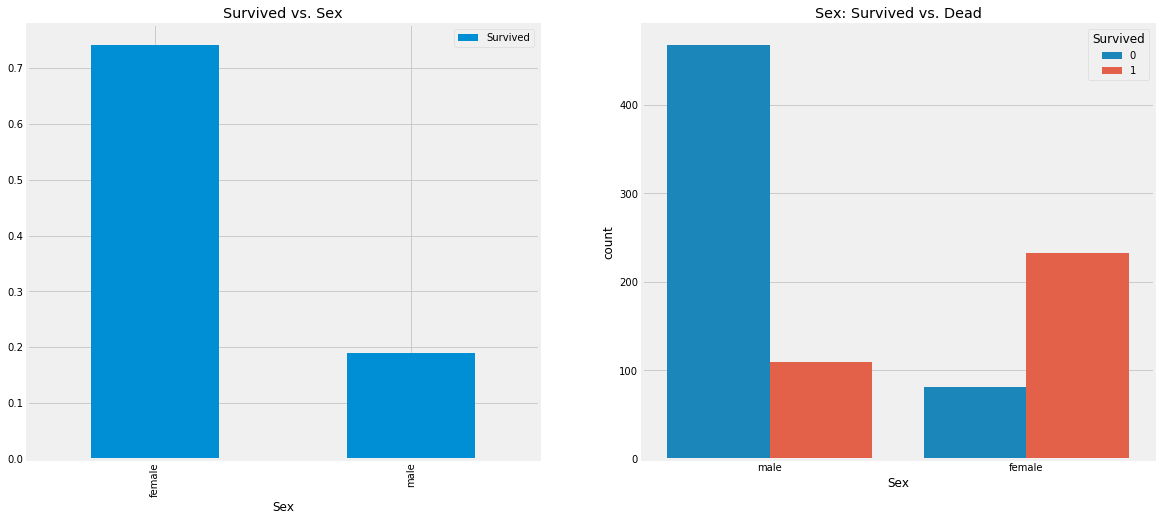

In [72]:
f, ax = plt.subplots(1,2, figsize=(18,8))
data[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs. Sex')

sns.countplot(data=data, x='Sex', hue='Survived', ax=ax[1])
ax[1].set_title('Sex: Survived vs. Dead')
plt.show()

This looks interesting. The number of men on the ship is lot more than the number of women. Still the number of women saved is almost twice the number of males saved. The survival rate for **women on the ship is arount 75% while for men in arount 18-19%.**  
  
This looks to be a **very important** feature for modeling. But is it best? Let's check other features.

## Pclass ⇒ Ordinal Feature

In [73]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True).style.background_gradient(cmap='summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


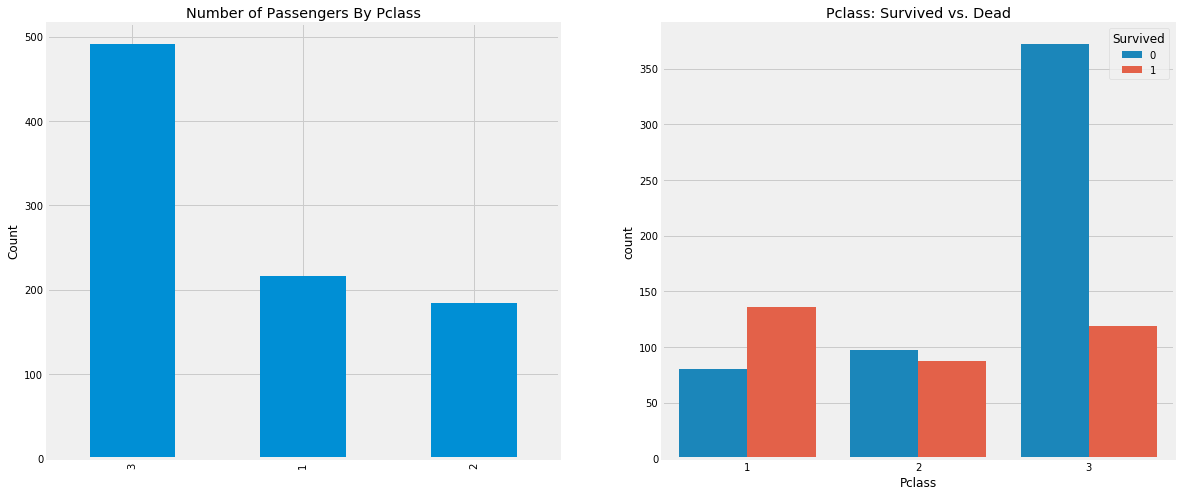

In [74]:
fig, ax = plt.subplots(1,2,figsize=(18,8))
data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass')
ax[0].set_ylabel('Count')

sns.countplot(data=data, x='Pclass', hue='Survived', ax=ax[1])
ax[1].set_title('Pclass: Survived vs. Dead')
plt.show()

In [75]:
pd.DataFrame(data.groupby(['Pclass']).Survived.value_counts(normalize=True))

Survived
Pclass Survived          
1      1         0.629630
       0         0.370370
2      0         0.527174
       1         0.472826
3      0         0.757637
       1         0.242363

People say **Money Can't Buy Everything**. But we can clearly see that Passengers Of Pcalss 1 were given a very high priority while rescue. Even though the number of Passengers in Pclass 3 were a lot higher, still the number of survival from them is very low, somewhere around **24%**.  
  
For Pclass 1 survived is around **63%** while for Pclass 2 is around **47%**. So money and status matters.  
  
Let's dive in little bit more and check for other interesting observations. Let's check survival rate with **Sex and Pclass** together.

In [76]:
pd.crosstab([data['Sex'],data['Survived']], data['Pclass'], margins=True).style.background_gradient(cmap='summer_r')

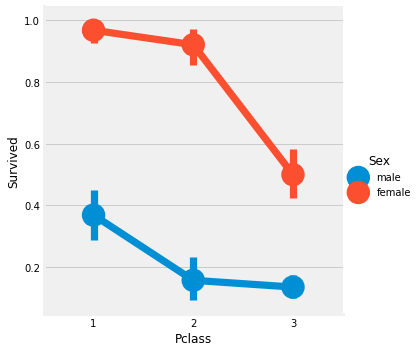

In [77]:
sns.factorplot('Pclass','Survived',hue='Sex',data=data)
plt.show()

We use **Factor Plot** in this case, because they make the seperation of categorical values easy.  
  
Looking at the **CrossTab** and the **Factor Plot**, we can easily infer that survival for **Women from Pclass1** is about **95-96%**, as only 3 out of 94 Women from Pclass1 died.  
  
It is evident that irrespective of Pclass, Women were given first priority while rescue. Even Men from Pclass1 have a very low survival rate.  
  
Looks like Pclass is also important feature. Let's analyse other features.

## Age ⇒ Countinuous Feature

In [78]:
print('Oldest Passenger was of: {} Years'.format(data['Age'].max()))
print('Youngest Passenger was of: {} Years'.format(data['Age'].min()))
print('Average Age on the ship: {} Years'.format(data['Age'].mean()))

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the ship: 29.69911764705882 Years


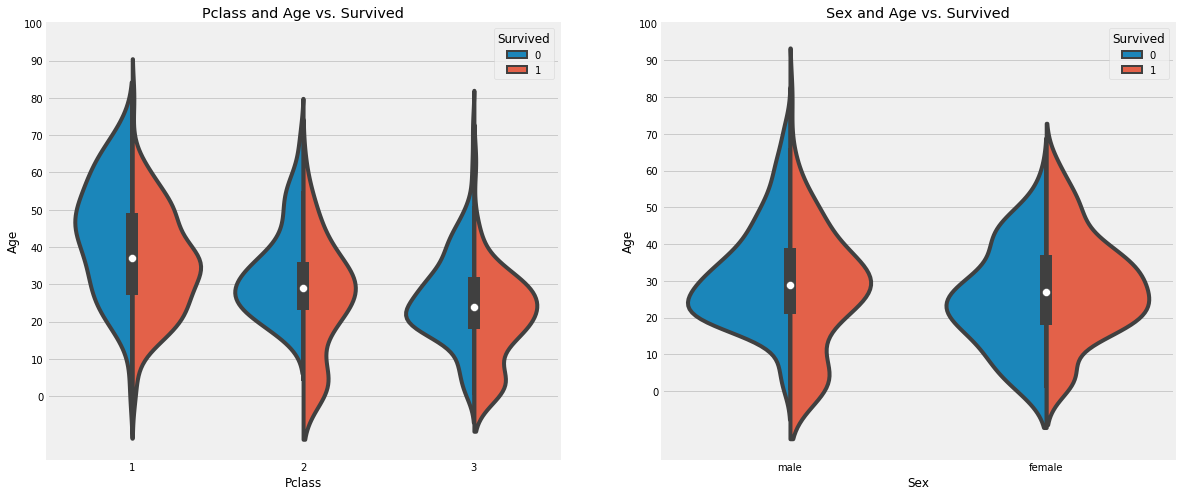

In [79]:
f, ax = plt.subplots(1,2, figsize=(18,8))

sns.violinplot('Pclass', 'Age', data=data, hue='Survived',split='count',ax=ax[0])
ax[0].set_title('Pclass and Age vs. Survived')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('Sex', 'Age',hue='Survived', data=data, split='count', ax=ax[1])
ax[1].set_title('Sex and Age vs. Survived')
ax[1].set_yticks(range(0,110,10))

plt.show()

#### Observations:  
1) The number of children increases with Pclass(1 ⇒ 2 ⇒ 3) and the survival rate for passengers below Age 10(i.e children) looks to be good irrespective of the Pclass.

In [80]:
df_age10 = data.loc[data['Age']<10]
pd.crosstab(df_age10['Pclass'],df_age10['Age'], margins=True)

Age,0.42,0.67,0.75,0.83,0.92,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,All
Pclass,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,3
2,0,1,0,2,0,2,2,3,2,1,1,1,2,0,17
3,1,0,2,0,0,5,7,3,7,3,2,2,2,8,42
All,1,1,2,2,1,7,10,6,10,4,3,3,4,8,62


2) Survival chances for passengers aged 20-50 from Pcalss1 is high and is even better for Women.  

3) For males, the survival chances decreases with an increase in age. ⇒ skewed in right  
  
  

  
As we had seen earlier, the Age feature has **177 null values**. To replace these NaN values, we can assign them the mean age of dataset.  
  
But the problem is, there were many people with many different ages. We just can't assign a 4 year kid with the mean age that is 29 years. **Is there any way to find out what ageband does the passenger lie?**  
  
There is a one solution. we can check the **Name** feature. Looking upon the feature, we can see that the names have a salutation like Mr or Mrs. Thus we can assign the mean values of Mr and Mrs to the respective groups.

#### What's In A Name? ⇒ Feature

In [81]:
data['Initial'] = 0

data['Initial'] = data['Name'].str.extract('([A-Za-z]+)\.') # extract the salutations

Here we are using the Regex: **[A-Za-z]+).** So what it does is, it looks for strings which lie between **A-Z or a-z** and followed by a **.(dot)**. So we successfully extract the Initials form the Name column.

In [82]:
pd.crosstab(data['Initial'], data['Sex']).T.style.background_gradient(cmap='summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


So there are some misspelled Initials like Mlle or Mme that stand for Miss. I will replace them with Miss and same thing for other values.

In [83]:
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],
                       ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],
                       inplace=True)

In [84]:
data.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

### Filling NaN Ages

In [85]:
## Assigning the NaN Values with the Ceil values of the mean ages.
data.loc[(data['Age'].isnull()) & (data['Initial']=='Master'), 'Age'] = 5
data.loc[(data['Age'].isnull()) & (data['Initial']=='Miss'), 'Age'] = 22
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mr'), 'Age'] = 33
data.loc[(data['Age'].isnull()) & (data['Initial']=='Mrs'), 'Age'] = 36
data.loc[(data['Age'].isnull()) & (data['Initial']=='Other'), 'Age'] = 46

In [86]:
data.Age.isnull().sum()  # So no null values left.

0

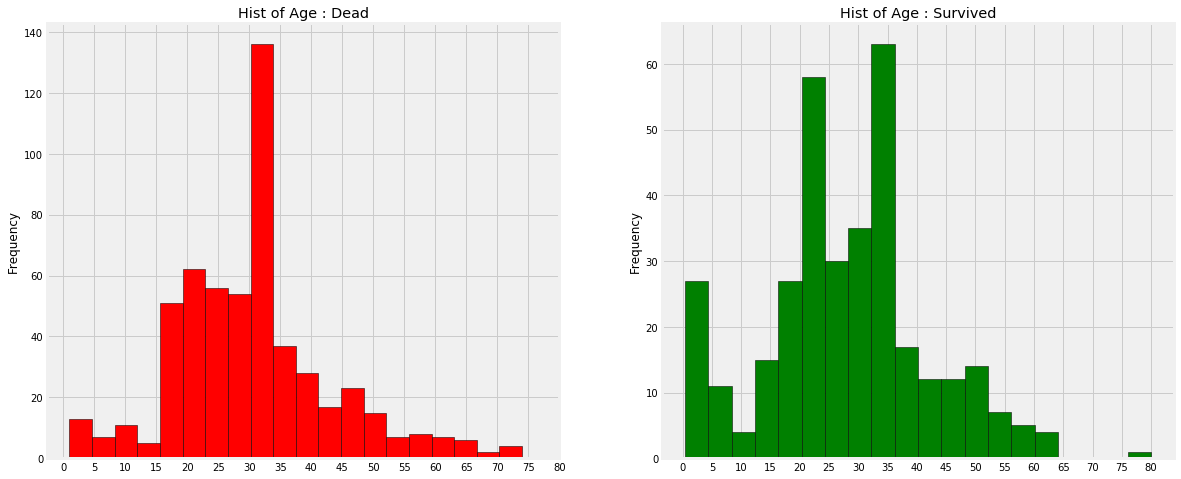

In [87]:
f, ax = plt.subplots(1,2, figsize=(18,8))

data[data['Survived']==0]['Age'].plot.hist( bins=20,  edgecolor='black', color='red', ax=ax[0])
ax[0].set_title('Hist of Age : Dead')
ax[0].set_xticks(range(0,85,5))

data[data['Survived']==1]['Age'].plot.hist(bins=20, edgecolor='black', color='green', ax=ax[1])
ax[1].set_title('Hist of Age : Survived')
ax[1].set_xticks(range(0,85,5))

plt.show()

#### Observations:
1) The Toddlers(Age<5) were saved in large numbers(The Women and Child First Policy).  
  
2) The Oldest Passenger was saved(80 years).  
  
3) Maximum number of deaths were in the age group of 30-40.



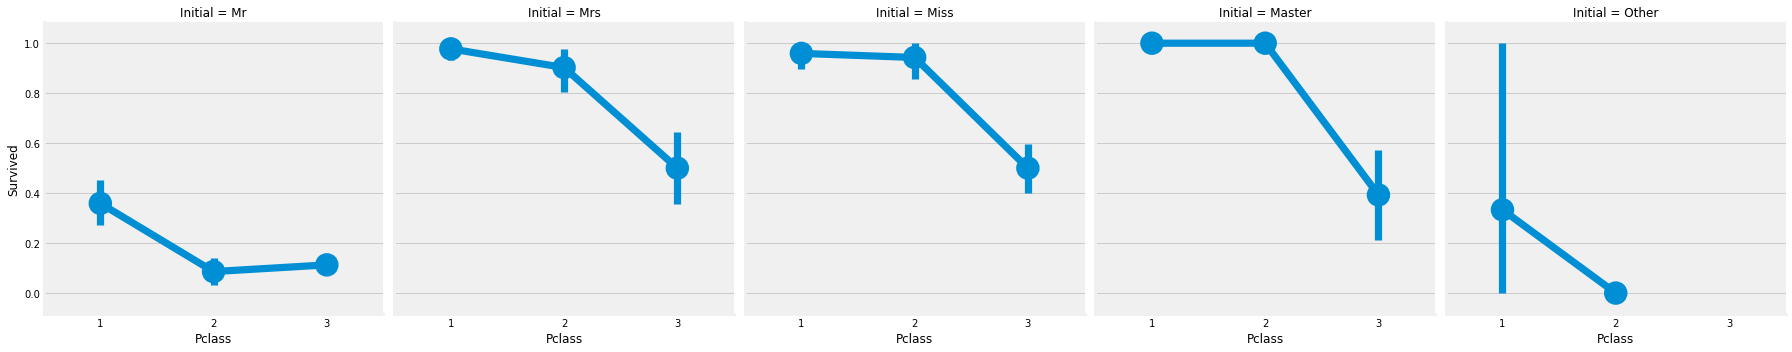

In [88]:
sns.factorplot('Pclass','Survived', col='Initial', data=data)
plt.show()

The Women and Child first policy thus holds true irrespective of the Pclass

## Embarked ⇒ Categorical Value

In [89]:
# 3개의 범주형 feature와 1개의 범주형 Target 즉, 4개의 범주형을 하나의 표로 정리
pd.crosstab([data['Embarked'],data['Pclass']], [data['Sex'],data['Survived']], 
            margins=True).style.background_gradient(cmap='summer_r')

#### Chances for Survival by Port Of Embarkation

<Figure size 360x216 with 0 Axes>

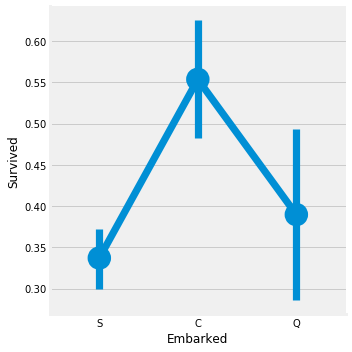

In [90]:
plt.figure(figsize=(5,3))
sns.factorplot(x='Embarked', y='Survived', data=data)
plt.show()

The chances for survival for Port C is highest around 55% while it is lowest for S.

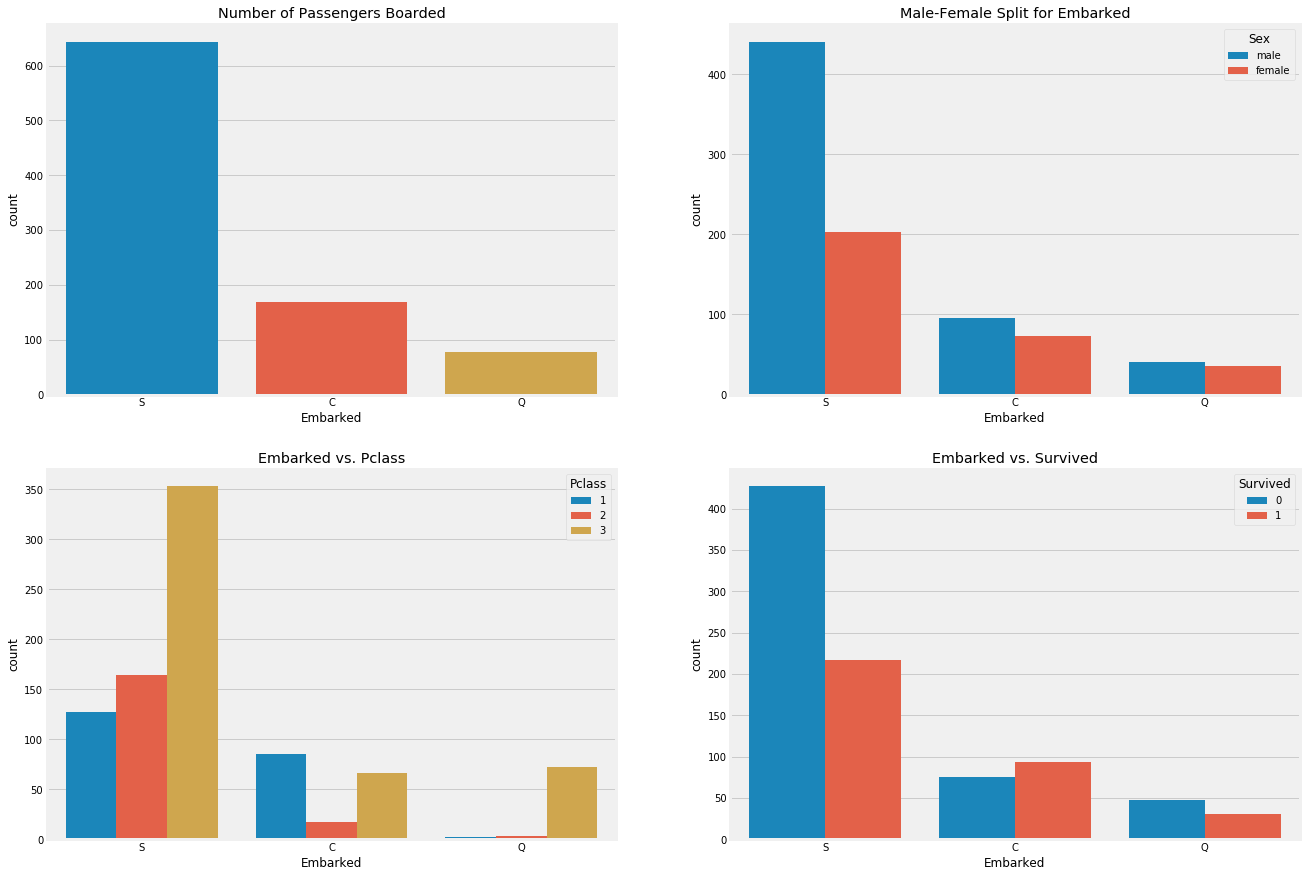

In [91]:
f,ax = plt.subplots(2,2, figsize=(20,15))

sns.countplot(data['Embarked'], ax=ax[0,0])
ax[0,0].set_title('Number of Passengers Boarded')

sns.countplot('Embarked', hue='Sex', data=data, ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')

sns.countplot('Embarked', hue='Pclass', data=data, ax=ax[1,0])
ax[1,0].set_title('Embarked vs. Pclass')

sns.countplot('Embarked', hue='Survived', data=data, ax=ax[1,1])
ax[1,1].set_title('Embarked vs. Survived')

plt.show()

In [92]:
pd.DataFrame(data.groupby(['Embarked'])['Pclass'].value_counts(normalize=True))

Pclass
Embarked Pclass          
C        1       0.505952
         3       0.392857
         2       0.101190
Q        3       0.935065
         2       0.038961
         1       0.025974
S        3       0.548137
         2       0.254658
         1       0.197205

#### Observations:  
1) Maximum passengers boarded from S. Majority of them being from Pclass 3.  
  
2) The passengers from C look to be lucky as a good proportion of them survived. The reason for this maybe the rescue of all the Pclass 1 and Pclass 2 passengers.  
  
3) The Embark S looks to the port from where majority of the rich people boarded. Still the chances for survival is low here, that is because many passengers from Pclass2 and Pclass3 around **81%** didn't survive.  
  
4) Port Q had almost 94% of the passengers were from Pclass 3.

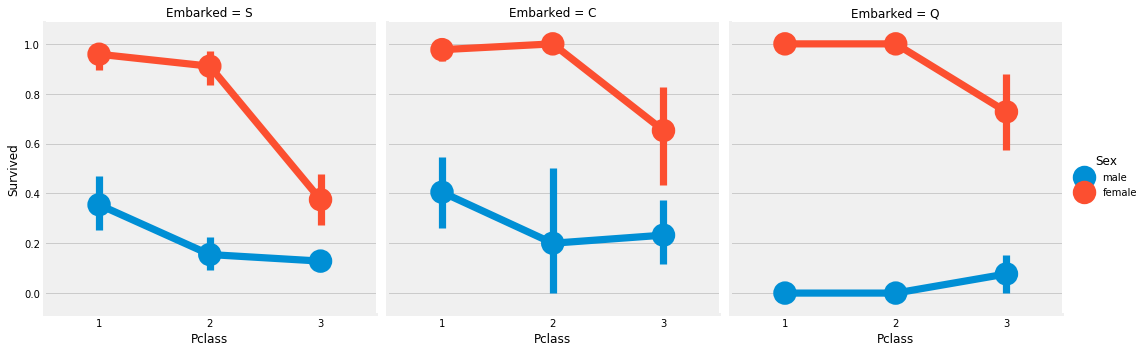

In [93]:
sns.factorplot('Pclass', 'Survived', col='Embarked', hue='Sex',data=data)
plt.show()

#### Observations:  
1) The survival chances are almost 1 for women for Pclass 1 and Pclass 2 irrespective of the Pclass.  
  
2) Port S looks to be very unlucky for Pclass 3 passengers as the survival rate for  borh men and women is very low.**(Money Matters)**.  
  
3) Port Q looks to be unlukiest for men, as almost all were from Pclass 3.

### Filling Embarked NaN  
As we saw that maximum passengers boarded from Port S, we replace NaN with S.

In [94]:
data['Embarked'].fillna('S', inplace=True)
data.Embarked.isnull().any()  # Finally No NaN Values.

False

## SibSp ⇒ Discrete Feature  
This feature represents whether a person is alone or with his family members.  
  
Sibling = brother, sister, stepbrother, stepsister  
  
Spouse = husband, wife

In [95]:
pd.crosstab(data['SibSp'], data['Survived']).style.background_gradient(cmap='summer_r')

Survived,0,1
SibSp,,
0,398,210
1,97,112
2,15,13
3,12,4
4,15,3
5,5,0
8,7,0


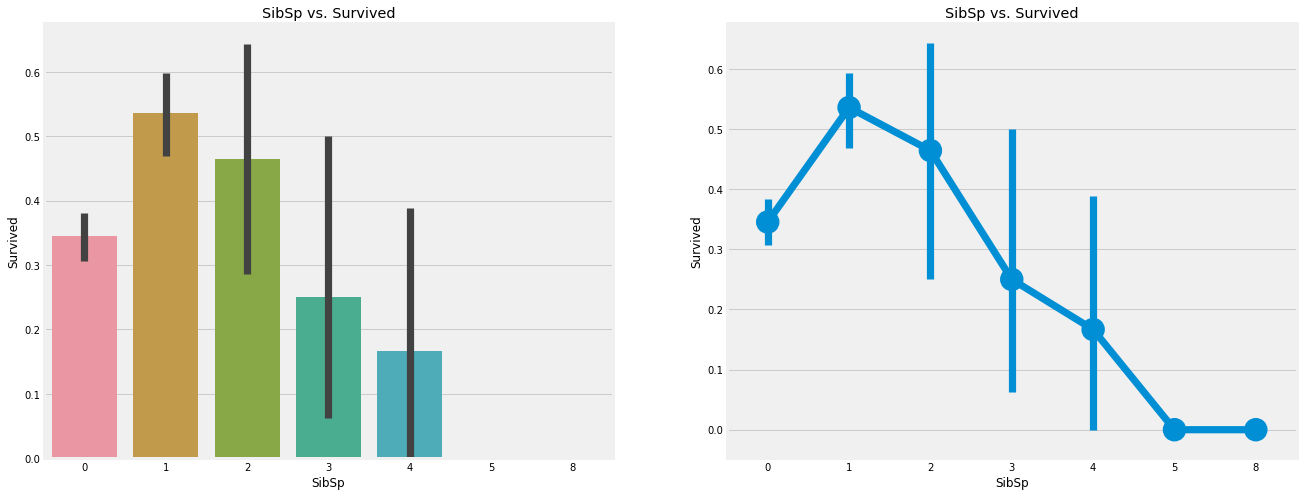

In [96]:
fig, ax = plt.subplots(1,2, figsize=(20,8))

sns.barplot(x='SibSp', y='Survived', data=data, ax=ax[0])
ax[0].set_title('SibSp vs. Survived')

sns.factorplot('SibSp','Survived', data=data, ax=ax[1])
ax[1].set_title('SibSp vs. Survived')

plt.close(2)
plt.show()

In [97]:
pd.crosstab(data['SibSp'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
SibSp,,,
0,137,120,351
1,71,55,83
2,5,8,15
3,3,1,12
4,0,0,18
5,0,0,5
8,0,0,7


#### Observations:  
  
The barplot and factorplot shows that if a passenger is alone onboard with no siblings, he have 34.5% survival rate. The graph roughly decreases if the number of siblings increase. This makes sense. That is, if I have a family on board, I will try to save them instead of saving myself first. Suprisingly the survival for familes with 5-8 members is **0%**. The reason may be Pclass?  
  
The reason is **Pclass**. The crosstab shows that person with SibSp>3 were all in Pclass3. It is imminent that all the large families in Pclass3(>3) died.

### Parch

In [98]:
pd.crosstab(data['Parch'], data['Pclass']).style.background_gradient(cmap='summer_r')

Pclass,1,2,3
Parch,,,
0,163,134,381
1,31,32,55
2,21,16,43
3,0,2,3
4,1,0,3
5,0,0,5
6,0,0,1


The crosstab again shows that larger families were in Pclass 3.

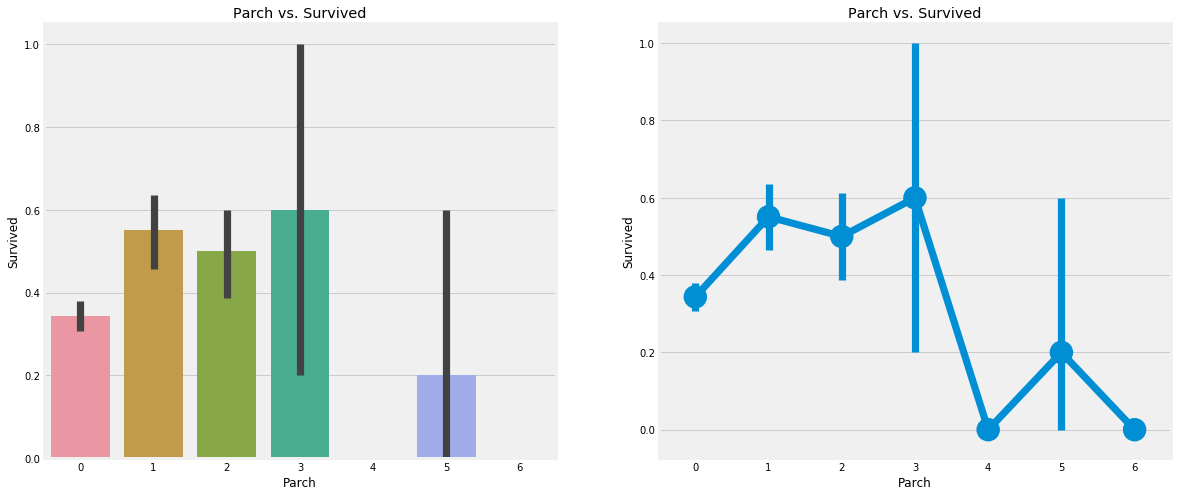

In [99]:
fig, ax = plt.subplots(1,2,figsize=(18,8))

sns.barplot(data['Parch'], data['Survived'], ax=ax[0])
ax[0].set_title('Parch vs. Survived')

sns.factorplot('Parch','Survived',data=data, ax=ax[1])
ax[1].set_title('Parch vs. Survived')

plt.close(2)
plt.show()

#### Observations: 
  
Here the results are quite similar. Passengers with their parents onboard have greater chance of survival. It however reduces as the number goes up.  
  
The chances of survival is good for somebody who has 1-3 parents on the ship. Being alone also proves to be fatal and the chances for survival decreases when somebody has Parch >4 on the ship.

### Fare ⇒ Continuous Feature

In [100]:
print('Highest Fare was: {}'.format(data['Fare'].max()))
print('Lowest Fare was: {}'.format(data['Fare'].min()))
print('Average Fare was: {}'.format(data['Fare'].mean()))

Highest Fare was: 512.3292
Lowest Fare was: 0.0
Average Fare was: 32.2042079685746


The lowest fare is **0.0**.

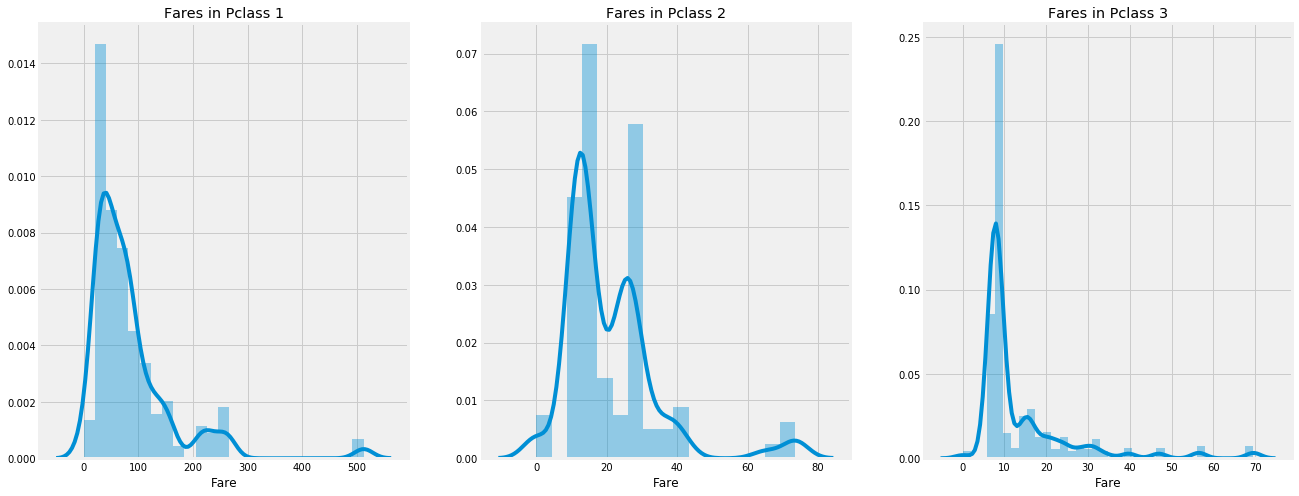

In [101]:
fig, ax = plt.subplots(1, 3, figsize=(20,8))

sns.distplot(data.loc[data['Pclass']==1,'Fare'], ax=ax[0])
ax[0].set_title('Fares in Pclass 1')

sns.distplot(data.loc[data['Pclass']==2,'Fare'], ax=ax[1])
ax[1].set_title('Fares in Pclass 2')

sns.distplot(data.loc[data['Pclass']==3,'Fare'], ax=ax[2])
ax[2].set_title('Fares in Pclass 3')

plt.show()

There looks to be a large distribution in the fares of passengers in Pclass 1 and this distribution goes on decreasing as the standards reduces. As this is also continuous, **we can convert into discrete values by using binning**.

### Observations In A Nutshell For All Features  
  
**Sex**: The chances of survival for women is high as compared to men.  
  
**Pclass**: There is a visible trend that being a **1st class passenger** gives you better chances of survival. The survival rate for **Pclass 3 is very low**. For **women**, the chance of survival from Pclass 1 is almost 100% and is high for those from Pclass2.  
  
**Age**: Children less than 5-10 years do have a high chance of survival. Passengers between 15-35 died a lot.  
  
**Embarked**: This is a very interesting feature. **The chances of survival at C looks to be better even though the majority of Pclass 1 passengers got up at S.** Passengers at Q were all from **Pclass 3**.  
  
**Parch+SibSp**: Having 1-2 siblings, spouse on board or 1-3 parents shows a greater chance of probability rather than being alone or having a large family traveling with you.

## Correlation Between The Features

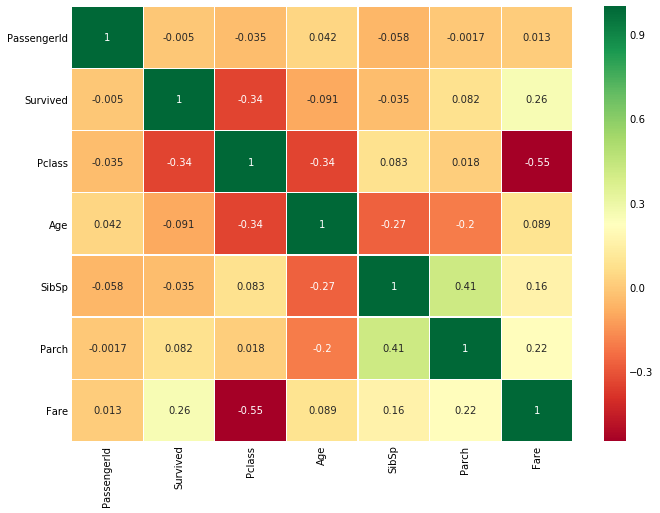

In [102]:
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn', linewidths=0.2)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

#### Interpreting The Heatmap  
  
The first thing to note is that only the numeric features are compared as it is obvious that we cannot correlate between alphabets or strings. Before understanding the plot, let us see what exactly correlation is.  
  
**Positive Correaltion**: If an **increase in feature A leads to increase in feature B, then they are positively correlated.** A value **1 means perfect positive correlation**.  
  
**Negative Correaltion**: If an **increase in feature A leads to decrease in feature B, then they are negatively correlated.** A value **-1 means perfect negative correlation**.  
  
Now let's say that two features are highly or perfectly correlated, so the increase in one leads to increase in the other. This means that both the features are containing highly similar information and there is very little or no variance in information. This is known as **Multicollinearity** as both them contain almost the same information.  
  
So do you think we should use both of them as **one of them is redundant**. While making or training models, we should try to eliminate redundant features as it reduces training time and many such advantages.  
  
Now from the above heatmap, we can see that the features are not much correlated. The highest correlation is between **SibSp and Parch(0.41)**. So we can carry on with all features.

# Part 2: Feature Engineering and Data Cleaning  
  
Now what is Feature Engineering?  
  
Whenever we are given a dataset with features, **it is not necessary that all the features will be important. There maybe many redundant features which should be eliminated. Also we can get or add new features by observing or extracting information from other features.**  
  
An example would be getting the Initials feature using the Name feature. Let's see if we can get any new features and eliminate a few. Also we will transform the existing relevant features to suitable form for Predictive Modeling.

### Age_band  

#### problem with Age Feature:  
  
As I have mentioned earlier that **Age is a continuous feature**, there is a problem with continuous variables in Machine Learning Models.  
  
**Eg:** If I say to group or arrange Sports Person by **Sex**, We can easily segregate them by Male and Female.  
  
Now if I say to group them by their **Age**, then how would you do it? If there are 30 persons, there may be 30 age values. Now this is problematic.  
  
We need to convert these **continuous values into categorical values** by either Binning or Normalisation. I will be using binning. i.e group a range of ages into a single bin or assign them a single value.  
  
The maximum age of a passenger was 80. So let's divide the range from 0-80 into 5 bins. So, 80/5=16 ie. bins of size 16.

In [103]:
def age_band(x):
    if x<=16:
        return 0
    elif x<=32:
        return 1
    elif x<=48:
        return 2
    elif x<=64:
        return 3
    else:
        return 4
    
data['Age_band'] = data['Age'].apply(age_band)
data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_band
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,2


In [104]:
data['Age_band'].value_counts().to_frame().style.background_gradient(cmap='summer_r')

,Age_band
1,382
2,325
0,104
3,69
4,11


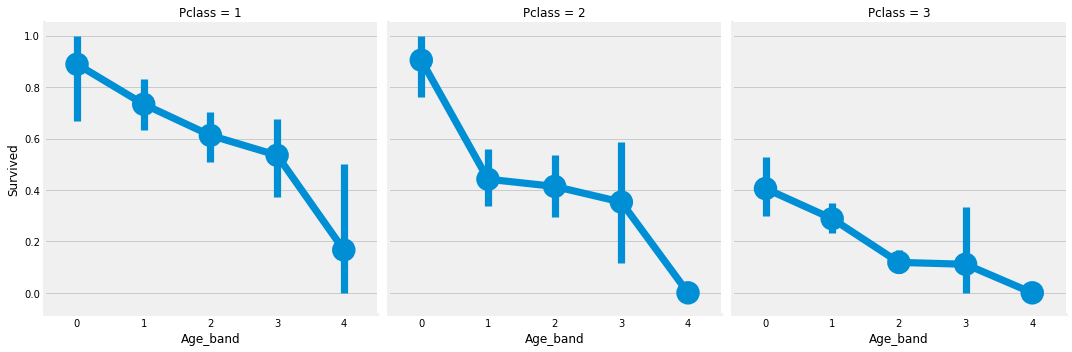

In [105]:
sns.factorplot('Age_band','Survived',col='Pclass',data=data)
plt.show()

The Suvival rate decreases as the age increases irrespective of the Pclass.

### Famliy_Size and Alone  
  
At this point, we can create a new feature called "Famliy_size" and "Alone" and analyse it. This feature is the summation of Parch and SibSp. it gives us a combined data so that we can check if survival rate have anything to do with family size of the passengers. Alone will denote whether a passenger is alone or not.

In [106]:
data['Family_Size'] = 0
data['Family_Size'] = data['Parch'] + data['SibSp']   # family size
data['Alone'] = 0
data.loc[data['Family_Size'] ==0, 'Alone'] = 1   # Alone

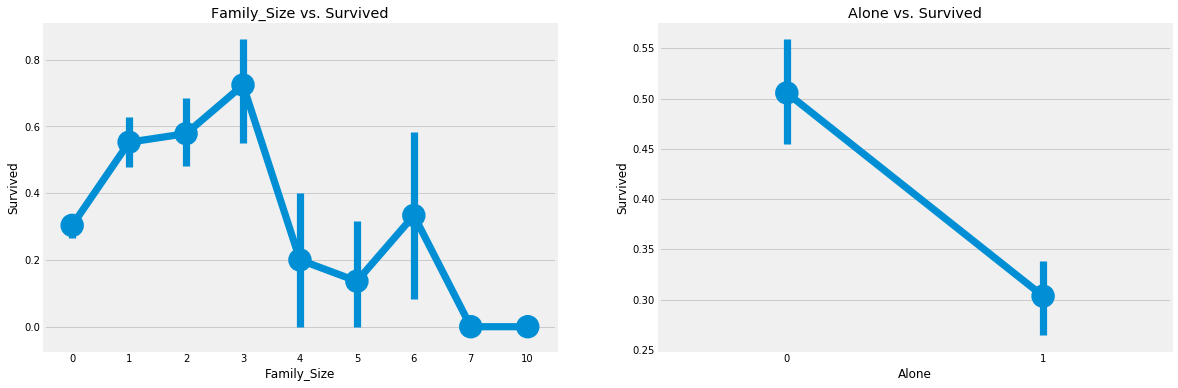

In [107]:
fig, ax = plt.subplots(1, 2, figsize=(18,6))
sns.factorplot('Family_Size', 'Survived', data=data, ax=ax[0])
ax[0].set_title('Family_Size vs. Survived')

sns.factorplot('Alone', 'Survived', data=data, ax=ax[1])
ax[1].set_title('Alone vs. Survived')

plt.close(2)
plt.close(3)
plt.show()

**Family_Size == 0 means that the passenger is alone.** Clearly, if you are alone or Family_Size = 0, then chances for survival is very low. For Family_Size > 4, the chances decrease too. This also looks to be an important feature for the model. Let's examine this further.

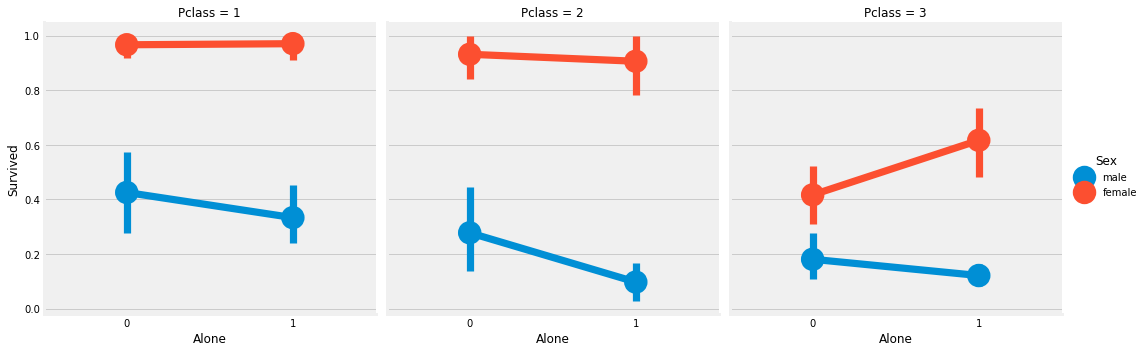

In [108]:
sns.factorplot('Alone', 'Survived', hue='Sex', col='Pclass',data=data)
plt.show()

It is visible that being alone is harmful irrespective of Sex or Pclass except for Pclass 3 where the chances of females who are alone is high than those with family.

**궁금증:**
  
⇒ 1) Family_Size == 0과 Alone == 1 은 중복되는 정보인데, 즉, Family_Size ⊃ Alone의 관계인데 두 가지 모두 쓰는 것이 옳은가?  
  
⇒ 2) Alone에 따른 전체적인 Survived의 경향은 Alone == 1일 때 Survived가 낮아지는 것이지만 한 가지 예외 (Pclass 3에서 여자의 경우 Alone == 1일 때 Survived가 높아짐)가 있어도 전체적인 경향을 보고 feature를 model에 넣는 것인가? 

### Fare_Range  
  
Since fare is also a continuous feature, we need to convert it into ordinal value. For this we will use **pandas.qcut**  
  
So what **qcut** does is it splits or arranges the value according the number of bins we have passed. So if we pass for 5 bins, it will arrange the values equally spaced into 5 seperate bins or value ranges.

In [109]:
data['Fare_Range'] = pd.qcut(data['Fare'], 4)   # split data['Fare'] according 4 ragnes
data.groupby(['Fare_Range'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Range,
"(-0.001, 7.91]",0.197309
"(7.91, 14.454]",0.303571
"(14.454, 31.0]",0.454955
"(31.0, 512.329]",0.581081


As discussed above, we can clearly see that as **fare_range increases, the chances of survival increases.**  
  
Now we cannot pass the Fare_Range values as it is. We sould convert it into singleton values same as we did in **Age_Band**

In [110]:
data['Fare_cat'] = 0
data.loc[data['Fare'] <=7.91, 'Fare_cat'] = 0
data.loc[(data['Fare'] > 7.91) & (data['Fare']<=14.454), 'Fare_cat'] = 1
data.loc[(data['Fare'] > 14.454) & (data['Fare']<=31.0), 'Fare_cat'] = 2
data.loc[(data['Fare'] > 31.0) & (data['Fare']<=512.329), 'Fare_cat'] = 3

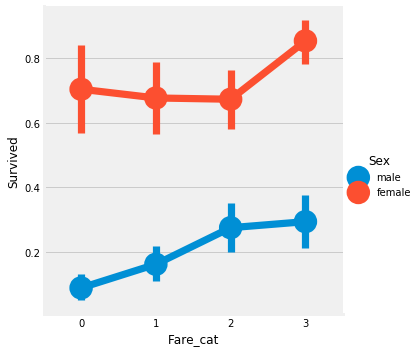

In [111]:
sns.factorplot('Fare_cat', 'Survived', hue='Sex',data=data)

Clearly, as the Fare_cat increases, the survival chances increases. This feature may become an important feature during modeling along with the Sex.

## Converting String Values into Numeric  
  
Since we cannot pass strings to a machine learning model, we need to convert features like Sex, Embarked, etc. into numeric values.

In [114]:
data.info()     # we have to convert ['Sex', 'Embarked', 'Initial'] into numeric.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 18 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
Initial        891 non-null object
Age_band       891 non-null int64
Family_Size    891 non-null int64
Alone          891 non-null int64
Fare_Range     891 non-null category
Fare_cat       891 non-null int64
dtypes: category(1), float64(2), int64(9), object(6)
memory usage: 119.3+ KB


In [117]:
data.Initial.value_counts()

Mr        529
Miss      186
Mrs       127
Master     40
Other       9
Name: Initial, dtype: int64

In [118]:
data['Sex'].replace(['male', 'female'], [0,1], inplace=True)
data['Embarked'].replace(['S', 'C','Q'], [0,1,2], inplace=True)
data['Initial'].replace(['Mr', 'Mrs','Miss','Master','Other'], [0,1,2,3,4], inplace=True)

#### Dropping UnNeeded Features  
  
**Name** ⇒ We don't need name feature as it cannot be converted into any categorical value.  
  
**Age** ⇒ We have the Age_band feature, so no need of this.  
  
**PassengerId** ⇒ Cannot be categorised.  
  
**Ticket** ⇒ It is any random string that cannot be categorised.  
  
**Fare** ⇒ We have the Fare_cat feature, so unneeded.  
  
**Fare_Range** ⇒ We have the Fare_cat feature.
  
**Cabin** ⇒ A lof of NaN values and also many passengers have multiple cabins. So this is a useless feature.  


**궁금증:**
  
⇒ Family_Size == 0과 Alone == 1 은 중복되는 정보인데, 즉, Family_Size ⊃ Alone의 관계인데 두 가지 모두 쓰는 것이 옳은가?  
  
⇒ SibSp와 Parch를 더하여 만들어진 Family_Size 역시 중복되는 정보인데 그대로 쓰는 게 옳은가?

In [ ]:
data.drop(['Name', 'Age', 'PassengerId', 'Ticket', 'Fare', 'Fare_Range','Cabin'], axis=1, inplace=True)

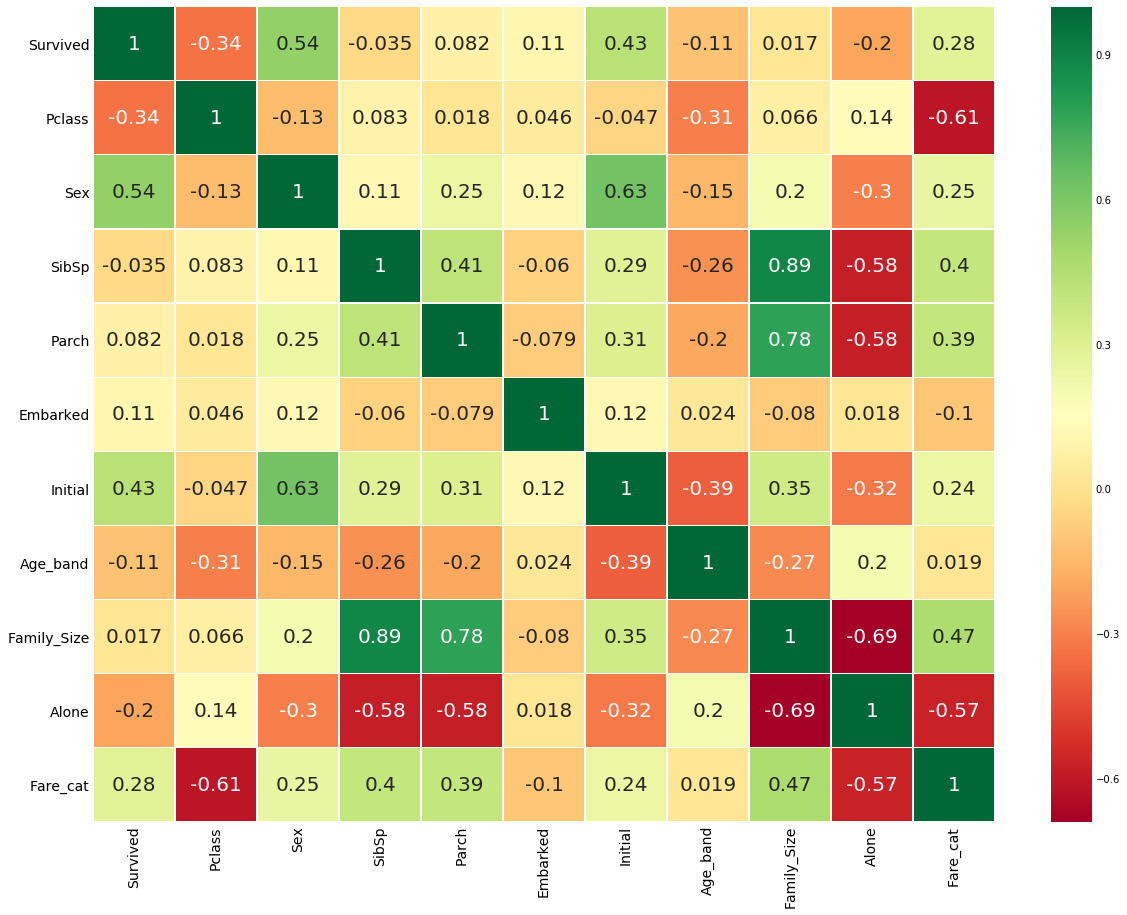

In [122]:
sns.heatmap(data.corr(), linewidths=0.2, annot=True, cmap='RdYlGn', annot_kws={'size':20})
fig = plt.gcf()
fig.set_size_inches(18,15)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

Now the above correlation plot, we can see some positively related features. Some of them being **SibSp and Family_Size** and **Parch and Family_Size** and some negative ones like **Alone and Family_Size**.

# Part 3: Predictive Modeling

We have gained some insights from the EDA part. But with that, we cannot accurately predict or tell whatever a passenger will survived or die. So now we will predict the whether the passenger will survive or not using some great Classification Algorithms. Following are the algorithms I will use to make the model:  
  
1) Logisitic Regression  
  
2) Support Vector Machines(Linear and radial)  
  
3) Random Forest  
  
4) K-Nearest Neighbors  
  
5) Naive Bayes  
  
6) Decision Tree


In [123]:
# Importing all the required ML packages  
# Model
from sklearn.linear_model import LogisticRegression  # Logisric Regression
from sklearn import svm   # Support Vector Machine
from sklearn.ensemble import RandomForestClassifier  # Random Forest
from sklearn.neighbors import KNeighborsClassifier   # KNN
from sklearn.naive_bayes import GaussianNB   # Naive Bayes
from sklearn.tree import DecisionTreeClassifier  # Decision Tree

# spliting the data and etc
from sklearn.model_selection import train_test_split  #training and testing data split
from sklearn import metrics  # accuracy measure
from sklearn.metrics import confusion_matrix  # for confusion matrix

In [124]:
train, test = train_test_split(data, test_size=0.3, random_state=0, stratify=data['Survived'])
train_X = train[train.columns[1:]]
train_Y = train[train.columns[:1]]
test_X = test[test.columns[1:]]
test_Y = test[test.columns[:1]]
X = data[data.columns[1:]]
Y = data['Survived']

### Radial Support Vector Machines (rbf-SVM)

In [127]:
model = svm.SVC(kernel='rbf', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction1 = model.predict(test_X)
print('Accuracy for rbf SVM is {}'.format(metrics.accuracy_score(prediction1, test_Y)))
print('Accuracy for rbf SVM is {}'.format(model.score(test_X, test_Y)))

Accuracy for rbf SVM is 0.835820895522388
Accuracy for rbf SVM is 0.835820895522388


### Linear Support Vector Machine(linear-SVM)

In [130]:
model = svm.SVC(kernel='linear', C=1, gamma=0.1)
model.fit(train_X, train_Y)
prediction2 = model.predict(test_X)
print('Accuracy for liner SVM is {}'.format(metrics.accuracy_score(prediction2, test_Y)))
print('Accuracy for liner SVM is {}'.format(model.score(test_X, test_Y)))

Accuracy for liner SVM is 0.7985074626865671
Accuracy for liner SVM is 0.7985074626865671


### Logistic Regression 

In [133]:
model = LogisticRegression()
model.fit(train_X, train_Y)
prediction3 = model.predict(test_X)
print('Accuracy for Logistic Regression is {}'.format(metrics.accuracy_score(prediction3,test_Y)))

Accuracy for Logistic Regression is 0.8208955223880597


### Decision Tree

In [134]:
model = DecisionTreeClassifier()
model.fit(train_X, train_Y)
prediction4 = model.predict(test_X)
print('Accuracy for Decision Tree is {}'.format(metrics.accuracy_score(prediction4, test_Y)))

Accuracy for Decision Tree is 0.8059701492537313


### K-Nearest Neighbors(KNN)

In [135]:
model = KNeighborsClassifier()
model.fit(train_X, train_Y)
prediction5 = model.predict(test_X)
print('Accuracy for KNN is {}'.format(metrics.accuracy_score(prediction5, test_Y)))

Accuracy for KNN is 0.8283582089552238


Now the accuracy for the KNN model changes as we change the values for **n_neighbors** attribute. The default value is **5**. Let's check the accuracies over various of n_neighbors.

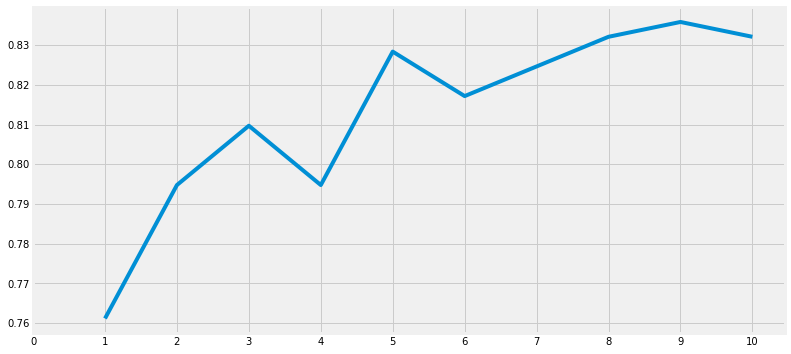

Acuuracies for different values of n: 
[0.76119403 0.79477612 0.80970149 0.79477612 0.82835821 0.81716418
 0.82462687 0.83208955 0.8358209  0.83208955]
 with the max value as 
0.835820895522388


In [140]:
a_index = list(range(1,11))
a = pd.Series()
x = [0,1,2,3,4,5,6,7,8,9,10]

for i in list(range(1,11)):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(train_X, train_Y)
    prediction = model.predict(test_X)
    a = a.append(pd.Series(metrics.accuracy_score(prediction, test_Y)))
    
plt.plot(a_index, a)
plt.xticks(x)
fig = plt.gcf()
fig.set_size_inches(12,6)
plt.show()

print('Acuuracies for different values of n: \n{}\n with the max value as \n{}'.format(a.values, a.values.max()))

### Gaussian Naive Bayes

In [141]:
model= GaussianNB()
model.fit(train_X, train_Y)
prediction6 = model.predict(test_X)
print('Accuracy for NaiveBayes is {}'.format(metrics.accuracy_score(prediction6, test_Y)))

Accuracy for NaiveBayes is 0.8134328358208955


### Random Forest

In [143]:
model = RandomForestClassifier(n_estimators=100)
model.fit(train_X, train_Y)
prediction7 = model.predict(test_X)

print('Accuracy for Random Forest is {}'.format(metrics.accuracy_score(prediction7, test_Y)))

Accuracy for Random Forest is 0.8134328358208955


The accuracy of a model is not the only factor that determines the robustness of the classifier. Let's say that a classifier is trained over a training data and tested over the test data and it scores an accuracy of 90%.  
  
Now this seems to be very good accuracy for a classifier, but can we confirm that it will be 90% for all the new test sets that come over? The answer is **No**, because we can't determine which all instances will the classifier will use to train itself. As the training and testing data changes, the accuracy will also change. It may increase or decrease. This is known as **model variance**.  
  
To overcome this and get a generalized model, we use **Cross Validation(CV)**.

## Cross Validation  
  
Many a times, the data is imbalanced, i.e there may be a high number of class 1 instances but less number of other class instances. Thus we should train and test our algorithm on each every instance of the dataset. Then we can take an average of all the noted accuracies over the dataset.  
  
1) The K-fold Cross Validation works by first dividing the dataset into k-subsets.  
  
2) Let's say we divide the dataset into (k=5) parts. We reserve 1 part for testing and train the algorithm over the 4 parts.  
  
3) We continue the process by changing the testing part in each iteration and training the algorithm over the other parts. The accuracies and errors are then averaged to get a average accuracy of the algorithm.  
  
This is called K-Fold Cross Validation(K-fold CV).  
  
4) An algorithm may underfit over a dataset for some training data and sometimes also overfit the data for other training set. Thus with cross validation, we can achieve a generalised model.  